In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
pd.set_option('display.max_columns', 500)

In [2]:
# reading the datasets
df_train = pd.read_csv('../input/loan-delinquency-prediction/train.csv').drop(['Unnamed: 0','loan_id'], axis = 1)
df_test = pd.read_csv('../input/loan-delinquency-prediction/test.csv').drop(['Unnamed: 0','loan_id'], axis = 1)
df_sub = pd.read_csv('../input/loan-delinquency-prediction/sample_submission.csv')
df_train.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,Y,"Martinez, Duffy and Bird",3.375,272000,180,2012-01-01,03/2012,72,2.0,31.0,770.0,B12,0.0,786.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Y,"Swanson, Newton and Miller",4.250,371000,360,2012-01-01,03/2012,95,1.0,45.0,727.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Y,OTHER,4.500,90000,360,2012-01-01,03/2012,69,1.0,39.0,726.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Y,"Turner, Baldwin and Rhodes",4.500,47000,240,2012-02-01,04/2012,75,1.0,43.0,688.0,B12,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,X,OTHER,4.875,177000,360,2012-01-01,03/2012,80,2.0,13.0,675.0,C86,0.0,672.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
# Number of features in the Dataset

print("Number of features in the Training Dataset :", len(df_train.columns))
print("Number of features in the Training Dataset :", len(df_test.columns))

Number of features in the Training Dataset : 28
Number of features in the Training Dataset : 27


In [4]:
#checking the features in the Dataset
print("\nNo of features in the Training Dataset = ", len(df_train.columns))
print("\nFeatures in the Training Dataset : \n\n", list(df_train.columns))


No of features in the Training Dataset =  28

Features in the Training Dataset : 

 ['source', 'financial_institution', 'interest_rate', 'unpaid_principal_bal', 'loan_term', 'origination_date', 'first_payment_date', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13']


In [5]:
#checking the data types of features in training  data
print(" Datatypes of features in the training dataset :\n",'-' * 45,"\n", df_train.dtypes)

 Datatypes of features in the training dataset :
 --------------------------------------------- 
 source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m1

In [6]:
#checking the number of rows
print(" Number of observations in the Training Dataset :",len(df_train))
print(" Number of observations in the Test Dataset :",len(df_test))

 Number of observations in the Training Dataset : 92846
 Number of observations in the Test Dataset : 23212


In [7]:
# checking if there are any NaN values in the train and test dataset
print("Null Values in the training dataset fetures: ", df_train.isnull().values.any())
print("Null Values in the test dataset features: ", df_test.isnull().values.any())

Null Values in the training dataset fetures:  False
Null Values in the test dataset features:  False


In [8]:
# making a list of categorical and numerical columns
category_columns=df_train.select_dtypes(include=['object']).columns.tolist()
numeric_columns=df_train.select_dtypes(exclude=['object']).columns.tolist()

In [9]:
# No of unique values in the all the columns
for cols in df_train.columns:
    print('Unique valeus in',cols,'column = ',df_train[cols].nunique())    

Unique valeus in source column =  3
Unique valeus in financial_institution column =  19
Unique valeus in interest_rate column =  813
Unique valeus in unpaid_principal_bal column =  637
Unique valeus in loan_term column =  127
Unique valeus in origination_date column =  3
Unique valeus in first_payment_date column =  4
Unique valeus in loan_to_value column =  92
Unique valeus in number_of_borrowers column =  2
Unique valeus in debt_to_income_ratio column =  57
Unique valeus in borrower_credit_score column =  219
Unique valeus in loan_purpose column =  3
Unique valeus in insurance_percent column =  13
Unique valeus in co-borrower_credit_score column =  216
Unique valeus in insurance_type column =  2
Unique valeus in m1 column =  4
Unique valeus in m2 column =  4
Unique valeus in m3 column =  5
Unique valeus in m4 column =  5
Unique valeus in m5 column =  7
Unique valeus in m6 column =  7
Unique valeus in m7 column =  8
Unique valeus in m8 column =  9
Unique valeus in m9 column =  10
Uniq

We can see that all the columns are discrete and except four, all the columns have less than 20 value types.

In [10]:
# categories in the categorical columns
for cols in df_train.columns:
    print('categories in',cols,'column = ',df_train[cols].unique(),'\n')    

categories in source column =  ['Y' 'X' 'Z'] 

categories in financial_institution column =  ['Martinez, Duffy and Bird' 'Swanson, Newton and Miller' 'OTHER'
 'Turner, Baldwin and Rhodes' 'Browning-Hart'
 'Sanchez, Hays and Wilkerson' 'Anderson-Taylor'
 'Cole, Brooks and Vincent' 'Nicholson Group' 'Miller, Mcclure and Allen'
 'Edwards-Hoffman' 'Romero, Woods and Johnson' 'Suarez Inc'
 'Taylor, Hunt and Rodriguez' 'Chapman-Mcmahon' 'Richardson Ltd'
 'Richards-Walters' 'Sanchez-Robinson' 'Thornton-Davis'] 

categories in interest_rate column =  [3.375 4.25  4.5   4.875 3.875 4.    3.75  4.75  4.125 4.375 3.5   3.125
 3.25  3.625 3.31  3.3   3.    3.853 3.276 4.625 3.99  2.875 2.75  3.9
 5.    3.369 5.25  5.04  3.865 3.97  4.21  3.33  3.96  3.95  4.188 2.92
 3.98  3.83  2.5   3.1   4.1   3.85  5.625 3.42  5.125 3.94  4.126 4.368
 4.99  3.7   3.385 3.861 4.49  5.375 5.5   3.958 3.8   3.56  4.405 4.3
 4.2   3.82  3.35  3.47  4.09  3.916 3.858 3.503 2.99  2.88  3.498 4.075
 4.544 3.2   3.273

Now we make a count plot of all the columns 

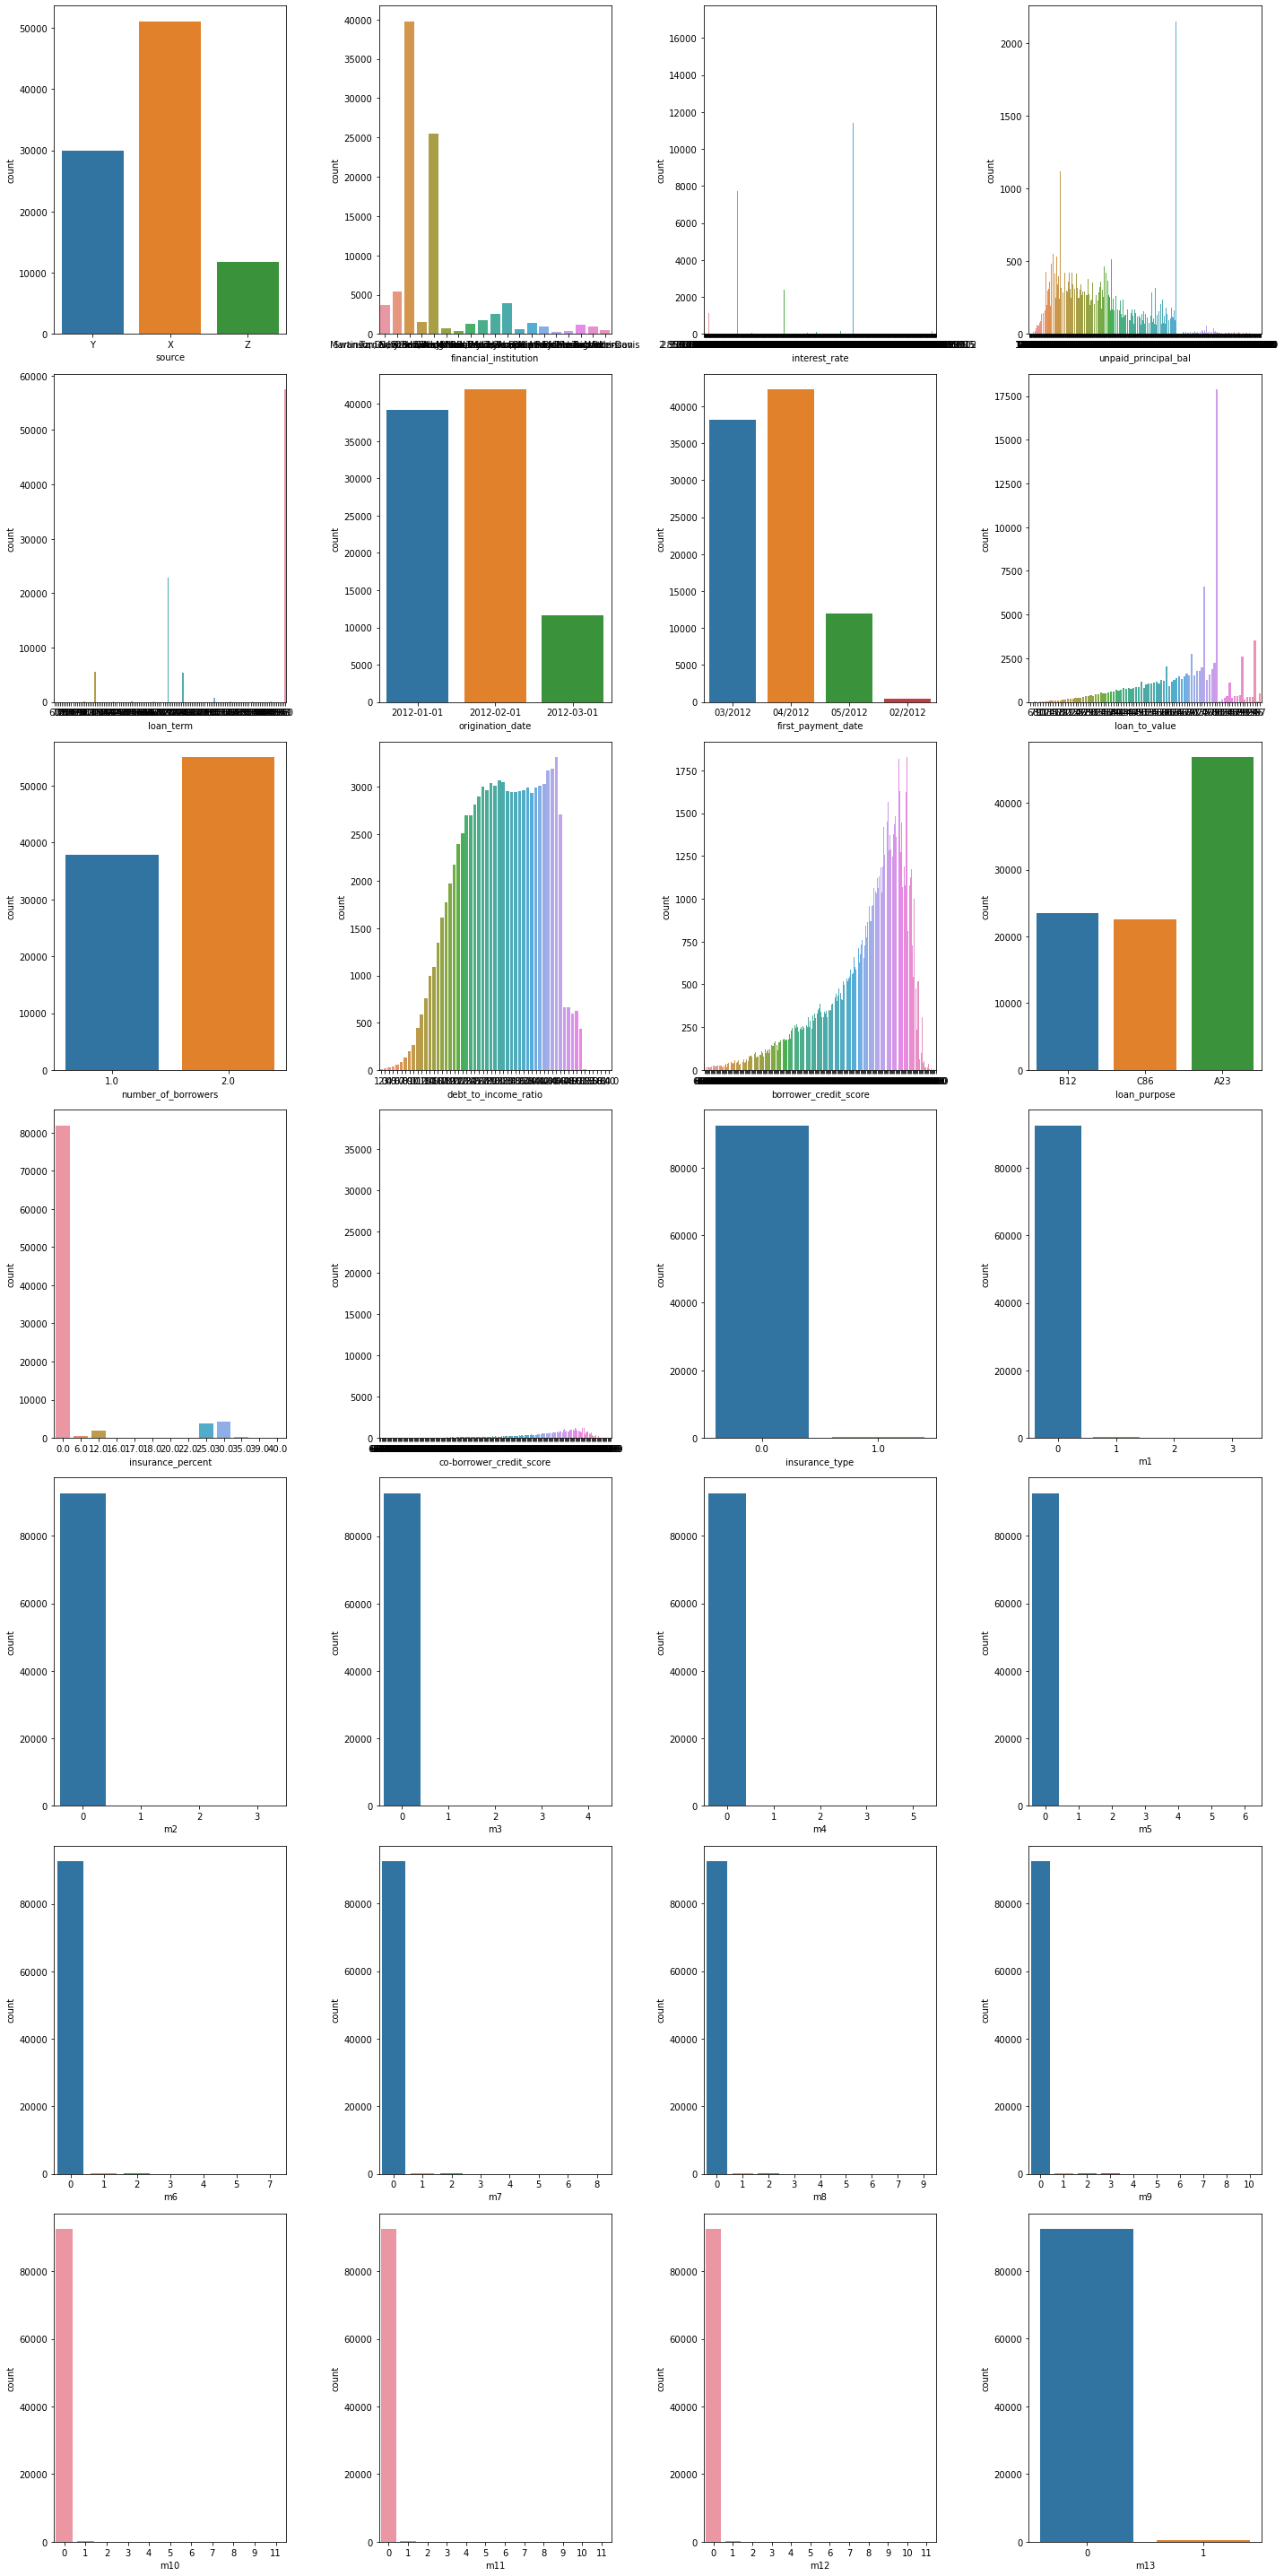

In [11]:
# Count plot of all the columns
fig = plt.figure(figsize=(20,40))
for i, col in enumerate(df_train.columns):   
    plt.subplot(7, 4, i+1)   
    sns.countplot(x=col, data=df_train).set(xlabel=col)    
plt.tight_layout()
plt.show()
plt.clf()
plt.close('all')

In [12]:
# Value count of all the columns
for column in df_train.columns:
     print("\n"+'Value counts of ' + column+ " column\n"+'-'*30)
     print(df_train[column].value_counts())


Value counts of source column
------------------------------
X    51067
Y    30018
Z    11761
Name: source, dtype: int64

Value counts of financial_institution column
------------------------------
OTHER                          39766
Browning-Hart                  25536
Swanson, Newton and Miller      5444
Edwards-Hoffman                 3903
Martinez, Duffy and Bird        3746
Miller, Mcclure and Allen       2553
Nicholson Group                 1733
Turner, Baldwin and Rhodes      1480
Suarez Inc                      1422
Cole, Brooks and Vincent        1290
Richards-Walters                1169
Taylor, Hunt and Rodriguez       998
Sanchez-Robinson                 956
Sanchez, Hays and Wilkerson      679
Romero, Woods and Johnson        596
Thornton-Davis                   510
Richardson Ltd                   384
Anderson-Taylor                  377
Chapman-Mcmahon                  304
Name: financial_institution, dtype: int64

Value counts of interest_rate column
------------------

In [13]:
df_train.describe()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000
mean,3.869010,208047.325679,292.362816,67.424606,1.592583,30.737792,769.963348,2.801338,459.209982,0.003274,0.003177,0.002057,0.001853,0.001993,0.003231,0.003167,0.003845,0.004577,0.005256,0.006484,0.007098,0.007916,0.005439
std,0.461126,114625.547432,89.723293,17.326684,0.491356,9.730489,42.311377,8.123954,382.068572,0.057128,0.062447,0.049621,0.050596,0.053589,0.074190,0.080327,0.091753,0.107406,0.123994,0.145742,0.158699,0.171575,0.073550
min,2.250000,14000.000000,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,120000.000000,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.875000,182000.000000,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.125000,278000.000000,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.750000,915000.000000,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,3.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,11.000000,11.000000,1.000000


In all the columns the mean is not too far from min-max values so we dont need to do any kind of scaling on the data. 

Now lets study the target column

In [14]:
# Class distribution of target column
print(df_train.m13.value_counts())

# class percentage distribution of target column
df_train.m13.value_counts()/len(df_train)*100

0    92341
1      505
Name: m13, dtype: int64


0    99.456089
1     0.543911
Name: m13, dtype: float64

The target colum is highly imbalanced once we will so oversampling/undersampling of the data points

### Correlation of independent variables to target column

In [15]:
# Correlation values of independent columsn to the target column
df_train.corr()['m13']

interest_rate               0.053255
unpaid_principal_bal       -0.013975
loan_term                   0.024570
loan_to_value               0.016697
number_of_borrowers        -0.037628
debt_to_income_ratio        0.037886
borrower_credit_score      -0.092417
insurance_percent           0.006261
co-borrower_credit_score   -0.040258
insurance_type              0.008578
m1                          0.083003
m2                          0.138590
m3                          0.159372
m4                          0.226792
m5                          0.253380
m6                          0.277835
m7                          0.301741
m8                          0.334979
m9                          0.365346
m10                         0.364462
m11                         0.411932
m12                         0.466867
m13                         1.000000
Name: m13, dtype: float64

We can see that monthwise delinquency peformance columns are related to target columns more than any other column.

## Encoding categorical columns

In [16]:
for col in category_columns:
    print(col ,'-->\n',df_train[col].value_counts(),'\n\n')

source -->
 X    51067
Y    30018
Z    11761
Name: source, dtype: int64 


financial_institution -->
 OTHER                          39766
Browning-Hart                  25536
Swanson, Newton and Miller      5444
Edwards-Hoffman                 3903
Martinez, Duffy and Bird        3746
Miller, Mcclure and Allen       2553
Nicholson Group                 1733
Turner, Baldwin and Rhodes      1480
Suarez Inc                      1422
Cole, Brooks and Vincent        1290
Richards-Walters                1169
Taylor, Hunt and Rodriguez       998
Sanchez-Robinson                 956
Sanchez, Hays and Wilkerson      679
Romero, Woods and Johnson        596
Thornton-Davis                   510
Richardson Ltd                   384
Anderson-Taylor                  377
Chapman-Mcmahon                  304
Name: financial_institution, dtype: int64 


origination_date -->
 2012-02-01    41951
2012-01-01    39235
2012-03-01    11660
Name: origination_date, dtype: int64 


first_payment_date -->
 04/2

In [17]:
df_train = pd.get_dummies(df_train, columns = category_columns)
df_test = pd.get_dummies(df_test, columns = category_columns)

## Modelling

### With only numeric columns

In [18]:
# train test split
X = df_train[numeric_columns]
y = df_train['m13']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [19]:
classifier = XGBClassifier(
#     scale_pos_weight = (183),
    eval_metric = 'error',use_label_encoder=False)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30466
           1       1.00      1.00      1.00       174

    accuracy                           1.00     30640
   macro avg       1.00      1.00      1.00     30640
weighted avg       1.00      1.00      1.00     30640

[[30466     0]
 [    0   174]]
1.0


The f1 score of 1 is not a realistic score so we will take all the columns and again do the run the model over all the columns

In [20]:
# train test split
X = df_train.drop(columns = 'm13')
y = df_train['m13']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

classifier = XGBClassifier(
#     scale_pos_weight = (183),
    eval_metric = 'error',use_label_encoder=False)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30466
           1       0.71      0.34      0.46       174

    accuracy                           1.00     30640
   macro avg       0.85      0.67      0.73     30640
weighted avg       0.99      1.00      0.99     30640

[[30441    25]
 [  114    60]]
0.4633204633204634


Now the score seems to be very less, reason being the target columns highly imbalanced

Let us do sampling of the data to balance target feature.
## Sampling
As the data is highly imbalanced we will first oversample the minority class using SMOTE and then undersample the majority  class using RandonUnderSampler to balance the minority class.

In [21]:
X = df_train.drop(columns = 'm13')
y = df_train['m13']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)


In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=.05)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = over.fit_resample(X, y)

In [23]:
y.value_counts()

0    92341
1     4617
Name: m13, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [25]:
classifier = XGBClassifier(
#     scale_pos_weight = (183),
    eval_metric = 'error',use_label_encoder=False)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f1_score(y_test, y_pred))

0.9485903814262022


Class distriburion of the train dataset

In [26]:
y_train.value_counts()

0    61902
1     3059
Name: m13, dtype: int64

In [27]:
y_train.value_counts()

0    61902
1     3059
Name: m13, dtype: int64

class distribution on predicted values

In [28]:
pd.DataFrame(y_pred).value_counts()

0    30540
1     1457
dtype: int64

Lets try few more models

In [29]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
# Step 3: Fit a Decision Tree model as comparison
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

0.8829236739974128

In [31]:
# Step 4: Fit a Random Forest model, " compared to "Decision Tree model, accuracy go up by 5%
clf1 = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
f1_score(y_test, y_pred1)

0.9290279179280189

In [32]:
# Step 5: Fit a AdaBoost model, " compared to "Decision Tree model, accuracy go up by 10%
clf2 = AdaBoostClassifier(n_estimators=100)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
f1_score(y_test, y_pred2)

0.9096530401923737

In [33]:
# Step 6: Fit a Gradient Boosting model, " compared to "Decision Tree model, accuracy go up by 10%
clf3 = GradientBoostingClassifier(n_estimators=100)
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
f1_score(y_test, y_pred3)

0.9098417068134893

AS XGBOOST IS GIVING  BETTER RESULT WE WILL USE THAT TO PRDICT THE TEST TARGET VALUES

In [34]:
y_sub_pred=classifier.predict(df_test)

In [35]:
len(y_sub_pred)

23212

In [36]:
df_sub['m13'] = y_sub_pred

Submission csv file

In [37]:
df_sub.to_csv('sub_xgboost_final.csv', index=False)